In [1]:
import numpy as np
import pandas as pd

global branin_et_05
#BraninExtraTrees
branin_et_05 = np.loadtxt('Branin05pls')
branin_et_Isolated= np.loadtxt('BraninIsolatedpls')
branin_et_Random = np.loadtxt('BraninRandompls')
branin_et_Best = np.loadtxt('Branin_bestpls')
branin_et_Best_SimAnneal = np.loadtxt('braninBestSimAnnealpls')
branin_et_Isolated_SimAnneal = np.loadtxt('braninIsolatedSimAnneal')

#EggholderExtraTrees
eggholder_et_05 = np.loadtxt('eggholder05')
eggholder_et_Isolated= np.loadtxt('eggholderisolated')
eggholder_et_Random = np.loadtxt('eggholderrandom')
eggholder_et_Best = np.loadtxt('eggholderbest')
eggholder_et_Best_SimAnneal = np.loadtxt('eggholderbestSimAnneal')
eggholder_et_Isolated_SimAnneal = np.loadtxt('eggholderIsolatedSimAnneal')

#HblauExtraTrees
hblau_et_05 = np.loadtxt('hblau05')
hblau_et_Isolated= np.loadtxt('hblauIsolated')
hblau_et_Random = np.loadtxt('hblauRandom')
hblau_et_Best = np.loadtxt('hblau_best')
hblau_et_Best_SimAnneal = np.loadtxt('hblauBestSimAnneal')
hblau_et_Isolated_SimAnneal = np.loadtxt('hblauIsolatedSimAnneal')

#BraninRBF
branin_rbf_05 = np.loadtxt('Branin05rbf')
branin_rbf_Isolated= np.loadtxt('BraninIsolatedrbf')
branin_rbf_Random = np.loadtxt('BraninRandomrbf')
branin_rbf_Best = np.loadtxt('braninbestrbf')
branin_rbf_Best_SimAnneal = np.loadtxt('braninBestSimAnnealrbf')
branin_rbf_Isolated_SimAnneal = np.loadtxt('braninIsolatedSimAnnealrbf')

#EggholderRBF
eggholder_rbf_05 = np.loadtxt('eggholder05rbf')
eggholder_rbf_Isolated= np.loadtxt('eggholderisolatedrbf')
eggholder_rbf_Random = np.loadtxt('eggholderrandomrbf')
eggholder_rbf_Best = np.loadtxt('eggholderbestrbf')
eggholder_rbf_Best_SimAnneal = np.loadtxt('eggholderbestSimAnnealrbf')
eggholder_rbf_Isolated_SimAnneal = np.loadtxt('eggholderIsolatedSimAnnealrbf')

#HblauExtraTreesRBF
hblau_rbf_05 = np.loadtxt('hblau05rbf')
hblau_rbf_Isolated= np.loadtxt('hblauIsolatedrbf')
hblau_rbf_Random = np.loadtxt('hblauRandomrbf')
hblau_rbf_Best = np.loadtxt('hblaubestrbf')
hblau_rbf_Best_SimAnneal = np.loadtxt('hblauBestSimAnnealrbf')
hblau_rbf_Isolated_SimAnneal = np.loadtxt('hblauIsolatedSimAnnealrbf')

#Braninnn
branin_nn_05 = np.loadtxt('Branin05nn')
branin_nn_Isolated= np.loadtxt('BraninIsolatednn')
branin_nn_Random = np.loadtxt('BraninRandomnn')
branin_nn_Best = np.loadtxt('Branin_bestnn')
branin_nn_Best_SimAnneal = np.loadtxt('braninBestSimAnnealnn')
branin_nn_Isolated_SimAnneal = np.loadtxt('braninIsolatedSimAnnealnn')

#Eggholdernn
eggholder_nn_05 = np.loadtxt('eggholder05nn')
eggholder_nn_Isolated= np.loadtxt('eggholderisolatednn')
eggholder_nn_Random = np.loadtxt('eggholderrandomnn')
eggholder_nn_Best = np.loadtxt('eggholder_bestnn')
eggholder_nn_Best_SimAnneal = np.loadtxt('eggholderbestSimAnnealnn')
eggholder_nn_Isolated_SimAnneal = np.loadtxt('eggholderIsolatedSimAnnealnn')

#HblauExtraTreesnn
hblau_nn_05 = np.loadtxt('hblau05nn')
hblau_nn_Isolated= np.loadtxt('hblauIsolatednn')
hblau_nn_Random = np.loadtxt('hblauRandomnn')
hblau_nn_Best = np.loadtxt('hblauBestnn')
hblau_nn_Best_SimAnneal = np.loadtxt('hblauBestSimAnnealnn')
hblau_nn_Isolated_SimAnneal = np.loadtxt('hblauIsolatedSimAnnealnn')

In [2]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [3]:
global df

def ArraytoDF(resultsArray, methodName, modelName, classifierName):
    
    df = pd.DataFrame(columns=['ExperimentNo', 'Iteration', 'Accuracy', 'Method','Model', 'Classifier'])   
    
    for i in range(21):
        for j in range(21):
            df = df.append({'ExperimentNo':i+1, 'Iteration':j+1, 'Accuracy':resultsArray[i][j]*100, 'Model':modelName, 'Method':methodName, 'Classifier':classifierName}, ignore_index=True)
        
    return df

In [4]:
def ResultsArray(a, b, c, d, e, f, model, classifier):

    Results = [ArraytoDF(a, 'Exploitation (p=0.5)', model, classifier),
                  ArraytoDF(b, 'Exploration (Most Isolated)', model, classifier),
                  ArraytoDF(c, 'Random Selection', model, classifier),
                  ArraytoDF(d, 'Best ( (0.5 - |0.5-p|) x d)', model, classifier),
                  ArraytoDF(e, 'Best + Simulated Annealing', model, classifier),
                  ArraytoDF(f, 'Most Isolated + Simulated Annealing', model, classifier)
                  ]
    
#     name = results
    
    return Results

In [5]:
branin_et =  pd.concat(ResultsArray(branin_et_05,branin_et_Isolated,branin_et_Random,branin_et_Best,branin_et_Best_SimAnneal,branin_et_Isolated_SimAnneal, 'Branin', 'Extra Trees'))
eggholder_et =  pd.concat(ResultsArray(eggholder_et_05,eggholder_et_Isolated,eggholder_et_Random,eggholder_et_Best,eggholder_et_Best_SimAnneal,eggholder_et_Isolated_SimAnneal, 'Eggholder', 'Extra Trees'))
hblau_et =  pd.concat(ResultsArray(hblau_et_05,hblau_et_Isolated,hblau_et_Random,hblau_et_Best,hblau_et_Best_SimAnneal,hblau_et_Isolated_SimAnneal, 'hblau', 'Extra Trees'))
branin_nn =  pd.concat(ResultsArray(branin_nn_05,branin_nn_Isolated,branin_nn_Random,branin_nn_Best,branin_nn_Best_SimAnneal,branin_nn_Isolated_SimAnneal, 'Branin', 'Neural Network'))
eggholder_nn =  pd.concat(ResultsArray(eggholder_nn_05,eggholder_nn_Isolated,eggholder_nn_Random,eggholder_nn_Best,eggholder_nn_Best_SimAnneal,eggholder_nn_Isolated_SimAnneal, 'Eggholder', 'Neural Network'))
hblau_nn =  pd.concat(ResultsArray(hblau_nn_05,hblau_nn_Isolated,hblau_nn_Random,hblau_nn_Best,hblau_nn_Best_SimAnneal,hblau_nn_Isolated_SimAnneal, 'hblau', 'Neural Network'))
branin_rbf =  pd.concat(ResultsArray(branin_rbf_05,branin_rbf_Isolated,branin_rbf_Random,branin_rbf_Best,branin_rbf_Best_SimAnneal,branin_rbf_Isolated_SimAnneal, 'Branin','RBF SVM'))
eggholder_rbf =  pd.concat(ResultsArray(eggholder_rbf_05,eggholder_rbf_Isolated,eggholder_rbf_Random,eggholder_rbf_Best,eggholder_rbf_Best_SimAnneal,eggholder_rbf_Isolated_SimAnneal, 'Eggholder','RBF SVM'))
hblau_rbf =  pd.concat(ResultsArray(hblau_rbf_05,hblau_rbf_Isolated,hblau_rbf_Random,hblau_rbf_Best,hblau_rbf_Best_SimAnneal,hblau_rbf_Isolated_SimAnneal, 'hblau','RBF SVM'))

In [6]:
import statistics
from scipy.stats import median_absolute_deviation, wilcoxon
from statsmodels.stats.multitest import multipletests

def wilcoxon_holm_eq_check(best_median_i, best_res):
    p_values = []
    #Gather the p-values for best med and other res from wilcoxon
    for i in range(len(best_res)):
        if i != best_median_i:
            _, p_value = wilcoxon(best_res[best_median_i], best_res[i])
            p_values.append(p_value)
        else:
            p_values.append(0)
    #holm correction
    reject, p_val_holm,_,_ = multipletests(p_values,alpha=0.1,method="holm")
    return reject

def printTable(best_res, acq_names):
    
    print('\\begin{center}')
    print('\\begin{tabular}{ |c|c|c|c| }')
    print('\hline')
    print('Method & Median Accuracy (\%) \\\\')
    print('\hline')
    for i in range(len(best_res)):
        print(f"{acq_names[i]}: & \\num{{{'{:.2f}'.format(medians[i],2)}}}",'\\\\')  
    print('\hline')
    print('\end{tabular}')
    print('\end{center}')
    
    return
def results(data_in, xlow, xhigh):
    
    import seaborn as sns
    from matplotlib import pyplot
    import matplotlib.pylab as pylab
    sns.set_theme(style="ticks", palette="pastel")

    # Load the example tips dataset
    
    BoxPlot_DF = data_in[(data_in['Iteration'] == 1)|(data_in['Iteration'] == 6)|(data_in['Iteration'] == 11)|(data_in['Iteration'] == 16)|(data_in['Iteration'] == 21)]    
    data = BoxPlot_DF
    
    palette = {'Exploitation (p=0.5)': '#ff2d00', 'Exploration (Most Isolated)': '#18ff00','Random Selection': '#26abff',
               'Best ( (0.5 - |0.5-p|) x d)': '#9000ff','Best + Simulated Annealing': '#e1ad01','Most Isolated + Simulated Annealing': '#ff69b4'}
    # Draw a nested boxplot to show bills by day and time

    fig, ax = pyplot.subplots(figsize=(20,10))
    plt = sns.boxplot(x="Iteration", y="Accuracy",data=data,
                hue="Method", palette=palette, ax=ax)
    ax.set(ylim=(xlow,xhigh))

    plt.legend(loc=2, prop={'size': 16})

    plt.axis

    adjust_box_widths(fig, 0.9)

    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)
    plt.grid(axis = 'y', color = 'black', linestyle = '-.', linewidth = 0.3)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylabel('Accuracy (%)')
    
    global medians
    medians = (statistics.median(data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Exploitation (p=0.5)')]['Accuracy'].tolist()),
               statistics.median(data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Exploration (Most Isolated)')]['Accuracy'].tolist()),
               statistics.median(data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Random Selection')]['Accuracy'].tolist()),
               statistics.median(data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Best ( (0.5 - |0.5-p|) x d)')]['Accuracy'].tolist()),
               statistics.median(data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Best + Simulated Annealing')]['Accuracy'].tolist()),
               statistics.median(data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Most Isolated + Simulated Annealing')]['Accuracy'].tolist()))

    best_median = max(medians)
    best_median_i = medians.index((best_median))

    best_res = ((data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Exploitation (p=0.5)')]['Accuracy'].tolist()),
               (data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Exploration (Most Isolated)')]['Accuracy'].tolist()),
               (data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Random Selection')]['Accuracy'].tolist()),
               (data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Best ( (0.5 - |0.5-p|) x d)')]['Accuracy'].tolist()),
               (data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Best + Simulated Annealing')]['Accuracy'].tolist()),
               (data_in.loc[(data_in['Iteration']==21) & (data_in['Method']=='Most Isolated + Simulated Annealing')]['Accuracy'].tolist()))
    print('medians list:', medians)
    print('best_median_i:',best_median_i)
    # print(best_res)
    print('best_res shape:', len(best_res), '*', len(best_res[0]))
    print('result = ', wilcoxon_holm_eq_check(best_median_i, best_res))
    

    print('median improvement: ',data_in[(data_in['Iteration'] == 21)]['Accuracy'].median()-(data_in[(data_in['Iteration'] == 1)]['Accuracy'].median()))
    print('median accuracy after 21 iterations: ',data_in[(data_in['Iteration'] == 21)]['Accuracy'].median())
    
    print()
    printTable(best_res, ['Exploitation (p=0.5)', 'Exploration (Most Isolated)','Random Selection',
               'Best ( (0.5 - |0.5-p|) x d)','Best + Simulated Annealing','Most Isolated + Simulated Annealing'])

<ipython-input-2-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):
F:\Anaconda\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


medians list: (67.19861565083637, 84.11843876177659, 81.88809844260719, 84.79138627187079, 87.19477023649299, 85.59892328398385)
best_median_i: 4
best_res shape: 6 * 21
result =  [ True  True  True  True  True  True]
median improvement:  32.14766391078638
median accuracy after 21 iterations:  84.28186887137089

\begin{center}
\begin{tabular}{ |c|c|c|c| }
\hline
Method & Median Accuracy (\%) \\
\hline
Exploitation (p=0.5): & \num{67.20} \\
Exploration (Most Isolated): & \num{84.12} \\
Random Selection: & \num{81.89} \\
Best ( (0.5 - |0.5-p|) x d): & \num{84.79} \\
Best + Simulated Annealing: & \num{87.19} \\
Most Isolated + Simulated Annealing: & \num{85.60} \\
\hline
\end{tabular}
\end{center}


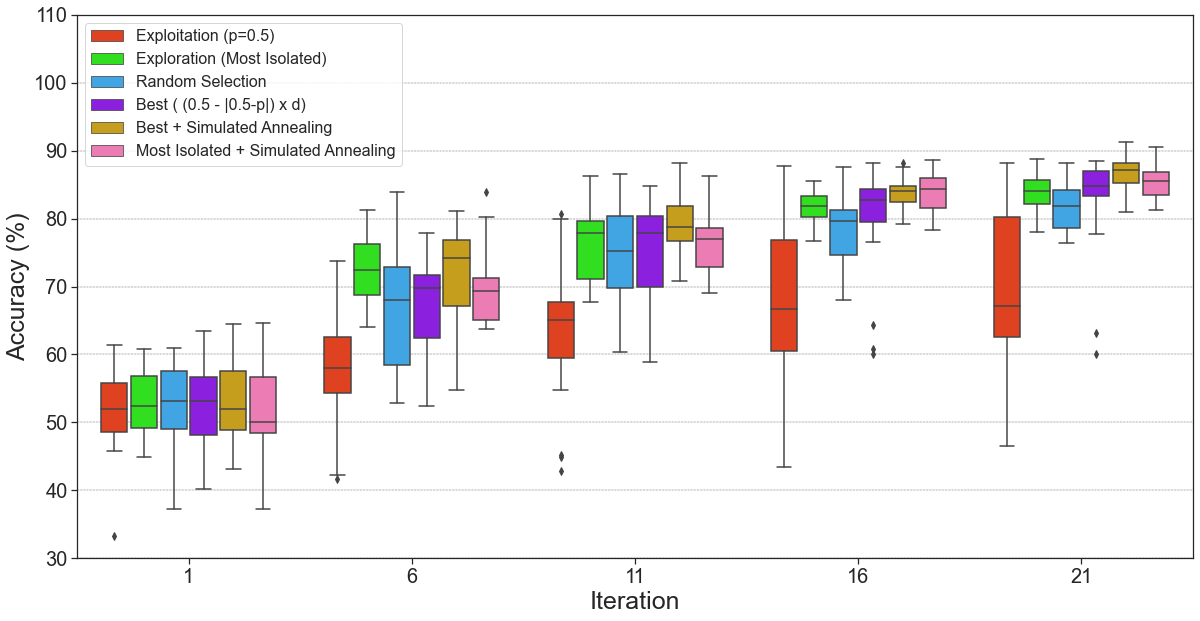

In [7]:
results(branin_et, 30, 110)

<ipython-input-2-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


medians list: (52.3335178011437, 51.3343171616553, 53.23741007194245, 52.3335178011437, 52.47494312242513, 52.01992252351965)
best_median_i: 2
best_res shape: 6 * 21
result =  [False  True  True False False False]
median improvement:  0.960769845661936
median accuracy after 21 iterations:  52.262805140502984

\begin{center}
\begin{tabular}{ |c|c|c|c| }
\hline
Method & Median Accuracy (\%) \\
\hline
Exploitation (p=0.5): & \num{52.33} \\
Exploration (Most Isolated): & \num{51.33} \\
Random Selection: & \num{53.24} \\
Best ( (0.5 - |0.5-p|) x d): & \num{52.33} \\
Best + Simulated Annealing: & \num{52.47} \\
Most Isolated + Simulated Annealing: & \num{52.02} \\
\hline
\end{tabular}
\end{center}


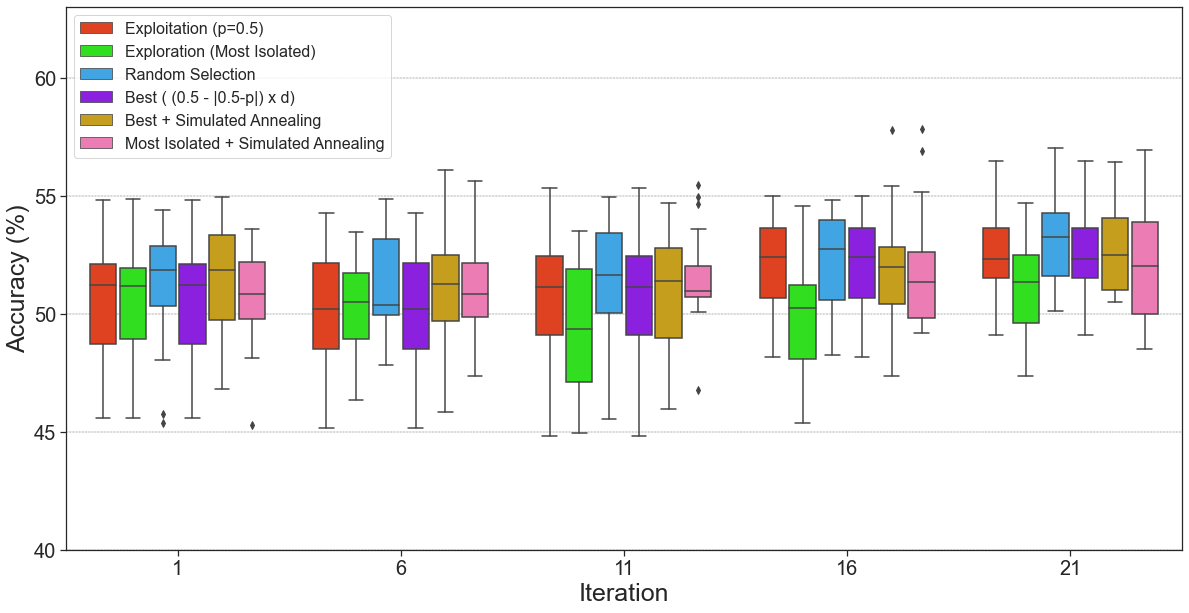

In [8]:
results(eggholder_et, 40,63)

<ipython-input-31-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):
F:\Anaconda\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


medians list: (73.19746202653336, 70.02499519323207, 73.87040953662756, 72.83214766391079, 74.85099019419343, 75.31243991540089)
best_median_i: 5
best_res shape: 6 * 21
result =  [False  True False False False  True]
median improvement:  15.708517592770626
median accuracy after 21 iterations:  73.44741395885407

\begin{center}
\begin{tabular}{ |c|c|c|c| }
\hline
Method & Median Accuracy (\%) \\
\hline
Exploitation (p=0.5): & \num{73.20} \\
Exploration (Most Isolated): & \num{70.02} \\
Random Selection: & \num{73.87} \\
Best ( (0.5 - |0.5-p|) x d): & \num{72.83} \\
Best + Simulated Annealing: & \num{74.85} \\
Most Isolated + Simulated Annealing: & \num{75.31} \\
\hline
\end{tabular}
\end{center}


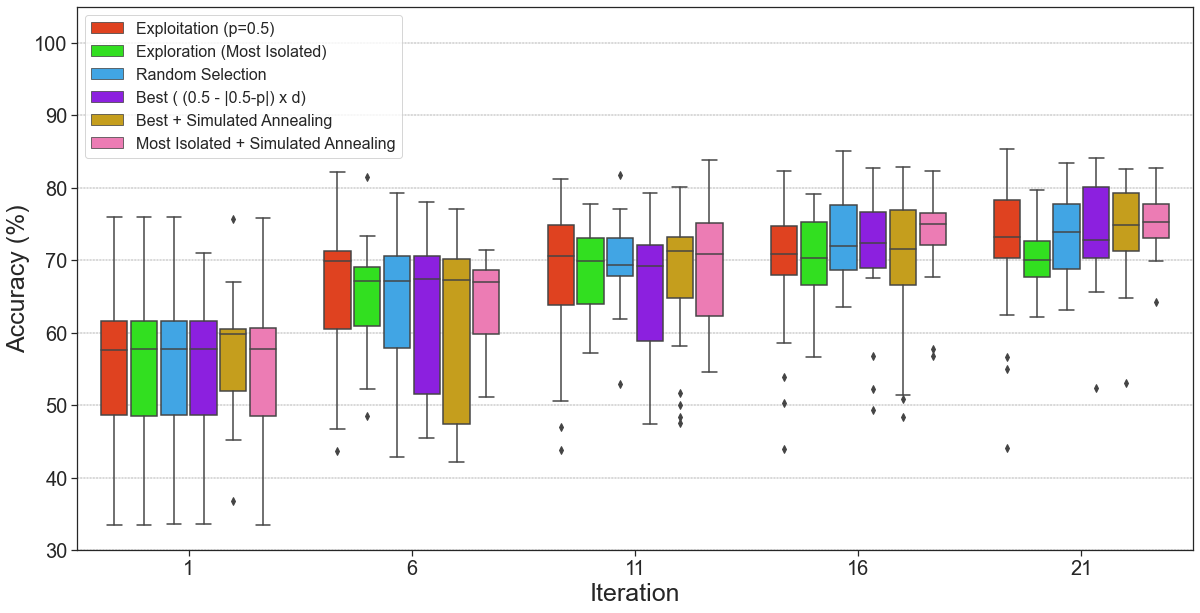

In [35]:
results(hblau_nn, 30, 105)

<ipython-input-31-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


medians list: (77.60046144972121, 81.67660065372044, 78.48490674870217, 79.02326475677755, 81.21515093251298, 84.31070947894635)
best_median_i: 5
best_res shape: 6 * 21
result =  [False False  True False False  True]
median improvement:  19.275139396269942
median accuracy after 21 iterations:  79.72505287444721

\begin{center}
\begin{tabular}{ |c|c|c|c| }
\hline
Method & Median Accuracy (\%) \\
\hline
Exploitation (p=0.5): & \num{77.60} \\
Exploration (Most Isolated): & \num{81.68} \\
Random Selection: & \num{78.48} \\
Best ( (0.5 - |0.5-p|) x d): & \num{79.02} \\
Best + Simulated Annealing: & \num{81.22} \\
Most Isolated + Simulated Annealing: & \num{84.31} \\
\hline
\end{tabular}
\end{center}


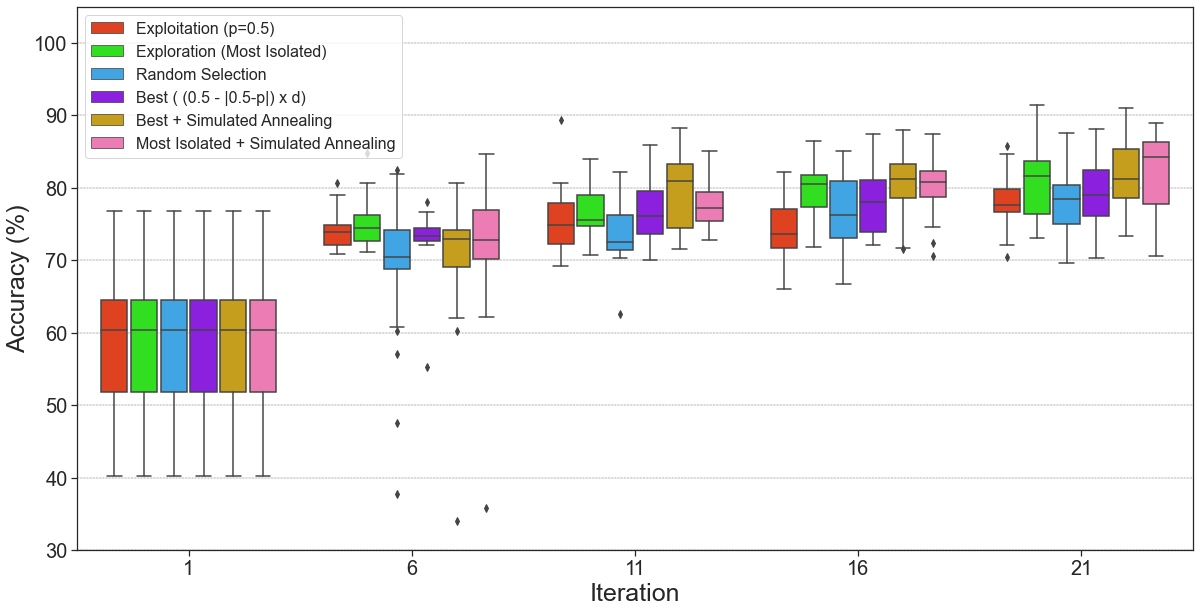

In [36]:
results(hblau_rbf, 30, 105)

<ipython-input-2-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


medians list: (61.565083637761965, 68.33301288213805, 64.81445875793116, 63.9300134589502, 66.2372620649875, 67.83310901749664)
best_median_i: 1
best_res shape: 6 * 21
result =  [ True  True False  True False False]
median improvement:  10.661411267064032
median accuracy after 21 iterations:  65.26629494328014

\begin{center}
\begin{tabular}{ |c|c|c|c| }
\hline
Method & Median Accuracy (\%) \\
\hline
Exploitation (p=0.5): & \num{61.57} \\
Exploration (Most Isolated): & \num{68.33} \\
Random Selection: & \num{64.81} \\
Best ( (0.5 - |0.5-p|) x d): & \num{63.93} \\
Best + Simulated Annealing: & \num{66.24} \\
Most Isolated + Simulated Annealing: & \num{67.83} \\
\hline
\end{tabular}
\end{center}


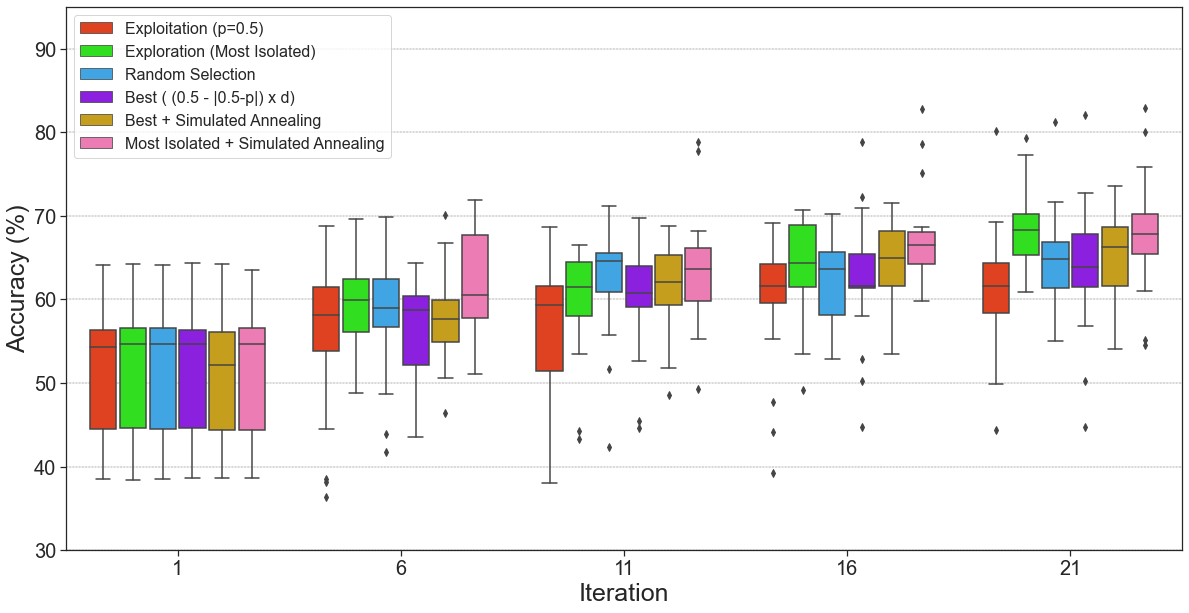

In [11]:
results(branin_nn,30, 95)

<ipython-input-2-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


medians list: (52.10536435300903, 50.10574889444338, 51.14401076716016, 52.336089213612766, 51.93232070755624, 51.970774850990196)
best_median_i: 3
best_res shape: 6 * 21
result =  [False  True False  True False False]
median improvement:  0.8459911555470114
median accuracy after 21 iterations:  51.31705441261296

\begin{center}
\begin{tabular}{ |c|c|c|c| }
\hline
Method & Median Accuracy (\%) \\
\hline
Exploitation (p=0.5): & \num{52.11} \\
Exploration (Most Isolated): & \num{50.11} \\
Random Selection: & \num{51.14} \\
Best ( (0.5 - |0.5-p|) x d): & \num{52.34} \\
Best + Simulated Annealing: & \num{51.93} \\
Most Isolated + Simulated Annealing: & \num{51.97} \\
\hline
\end{tabular}
\end{center}


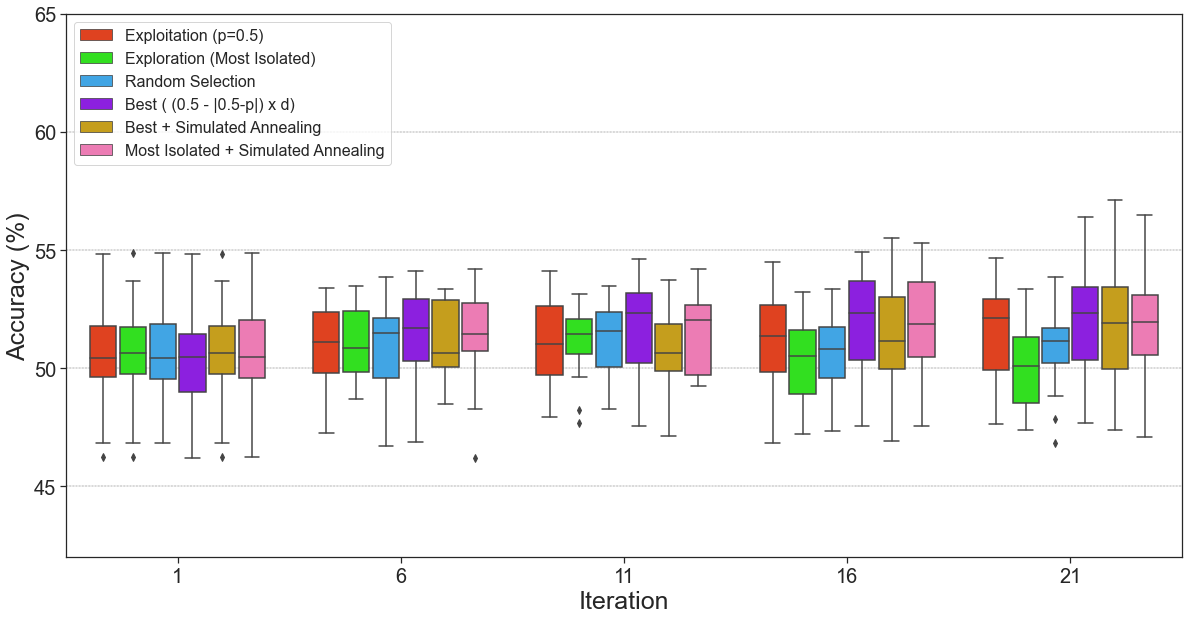

In [12]:
results(eggholder_nn, 42, 65)

<ipython-input-2-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


medians list: (79.17708133051336, 84.02230340319169, 81.48432993655067, 80.88829071332437, 85.54124206883291, 86.61795808498366)
best_median_i: 5
best_res shape: 6 * 21
result =  [ True False  True  True False  True]
median improvement:  27.97538934820227
median accuracy after 21 iterations:  83.54162661026726

\begin{center}
\begin{tabular}{ |c|c|c|c| }
\hline
Method & Median Accuracy (\%) \\
\hline
Exploitation (p=0.5): & \num{79.18} \\
Exploration (Most Isolated): & \num{84.02} \\
Random Selection: & \num{81.48} \\
Best ( (0.5 - |0.5-p|) x d): & \num{80.89} \\
Best + Simulated Annealing: & \num{85.54} \\
Most Isolated + Simulated Annealing: & \num{86.62} \\
\hline
\end{tabular}
\end{center}


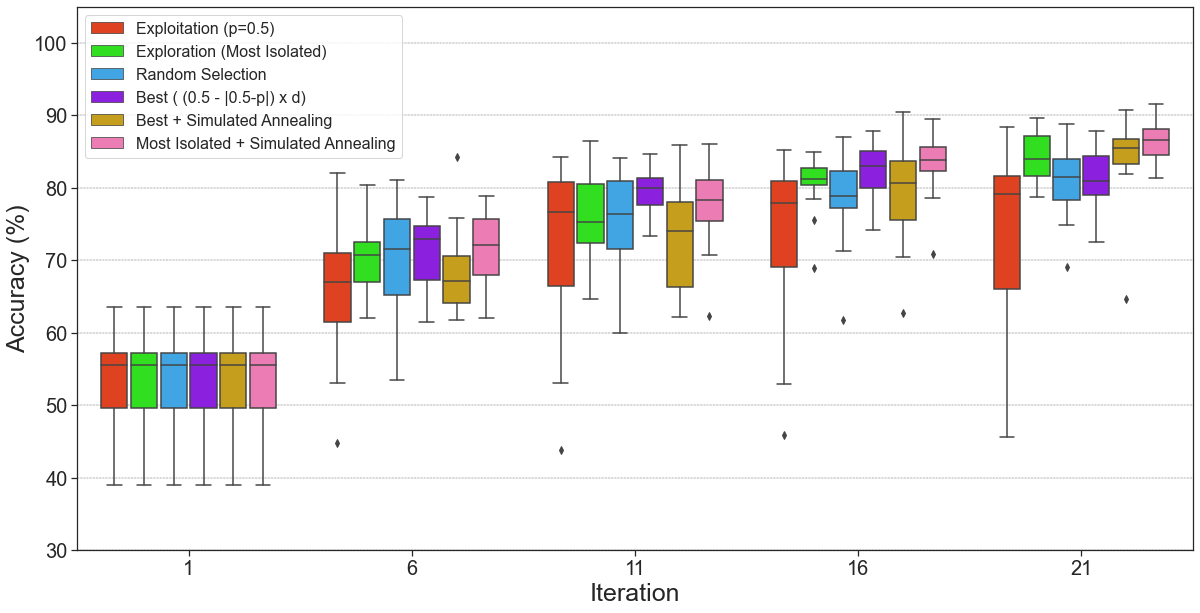

In [13]:
results(branin_rbf, 30, 105)

<ipython-input-2-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):
F:\Anaconda\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


medians list: (73.19746202653336, 70.02499519323207, 73.87040953662756, 72.83214766391079, 74.85099019419343, 75.31243991540089)
best_median_i: 5
best_res shape: 6 * 21
result =  [False  True False False False  True]
median improvement:  15.708517592770626
median accuracy after 21 iterations:  73.44741395885407

\begin{center}
\begin{tabular}{ |c|c|c|c| }
\hline
Method & Median Accuracy (\%) \\
\hline
Exploitation (p=0.5): & \num{73.20} \\
Exploration (Most Isolated): & \num{70.02} \\
Random Selection: & \num{73.87} \\
Best ( (0.5 - |0.5-p|) x d): & \num{72.83} \\
Best + Simulated Annealing: & \num{74.85} \\
Most Isolated + Simulated Annealing: & \num{75.31} \\
\hline
\end{tabular}
\end{center}


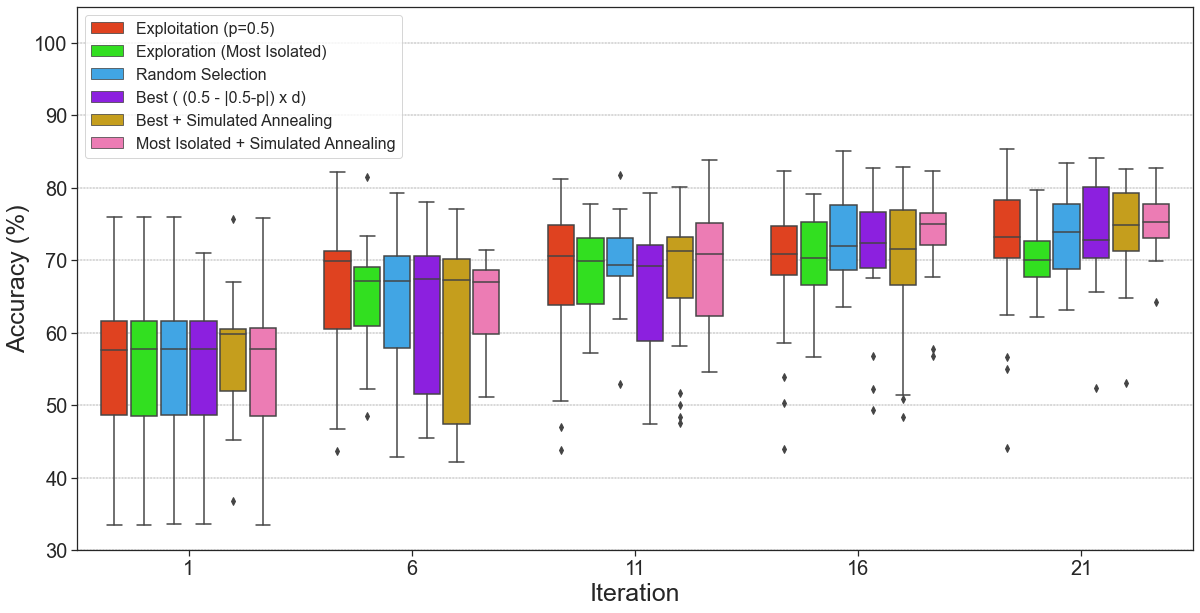

In [14]:
results(hblau_rbf,30,105)

<ipython-input-2-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


medians list: (50.913285906556425, 50.56719861565083, 51.6246875600846, 51.00942126514132, 52.54758700249952, 51.37473562776389)
best_median_i: 4
best_res shape: 6 * 21
result =  [False  True False  True  True  True]
median improvement:  0.22111132474523032
median accuracy after 21 iterations:  51.1920784464526

\begin{center}
\begin{tabular}{ |c|c|c|c| }
\hline
Method & Median Accuracy (\%) \\
\hline
Exploitation (p=0.5): & \num{50.91} \\
Exploration (Most Isolated): & \num{50.57} \\
Random Selection: & \num{51.62} \\
Best ( (0.5 - |0.5-p|) x d): & \num{51.01} \\
Best + Simulated Annealing: & \num{52.55} \\
Most Isolated + Simulated Annealing: & \num{51.37} \\
\hline
\end{tabular}
\end{center}


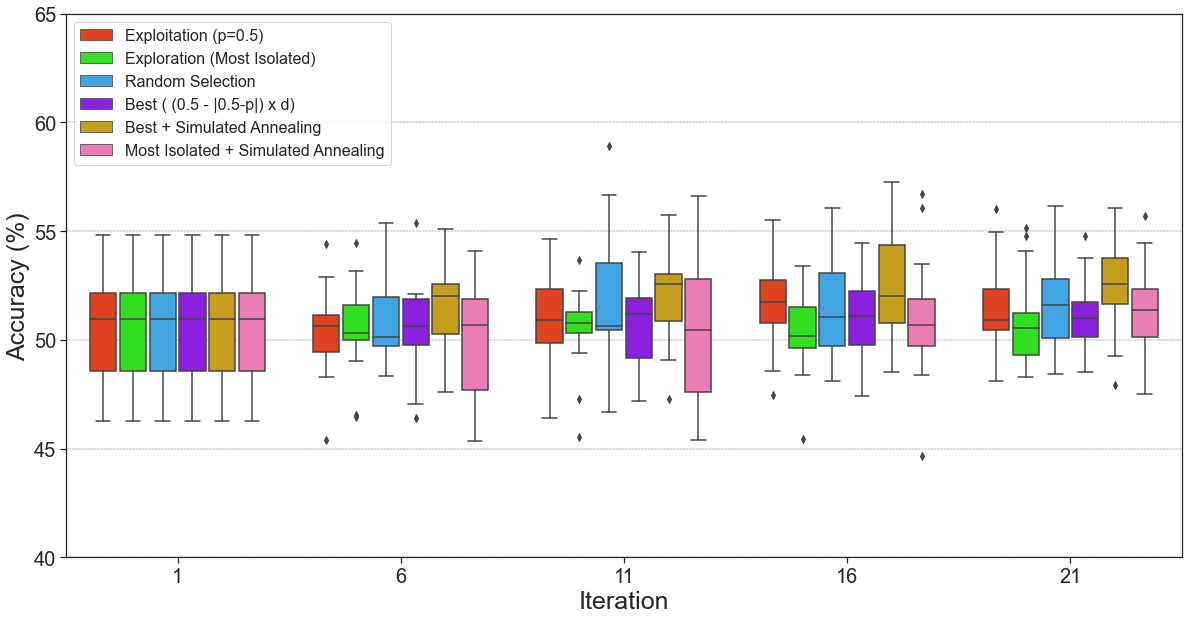

In [15]:
results(eggholder_rbf,40,65)

<ipython-input-31-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


Text(0, 0.5, 'Accuracy (%)')

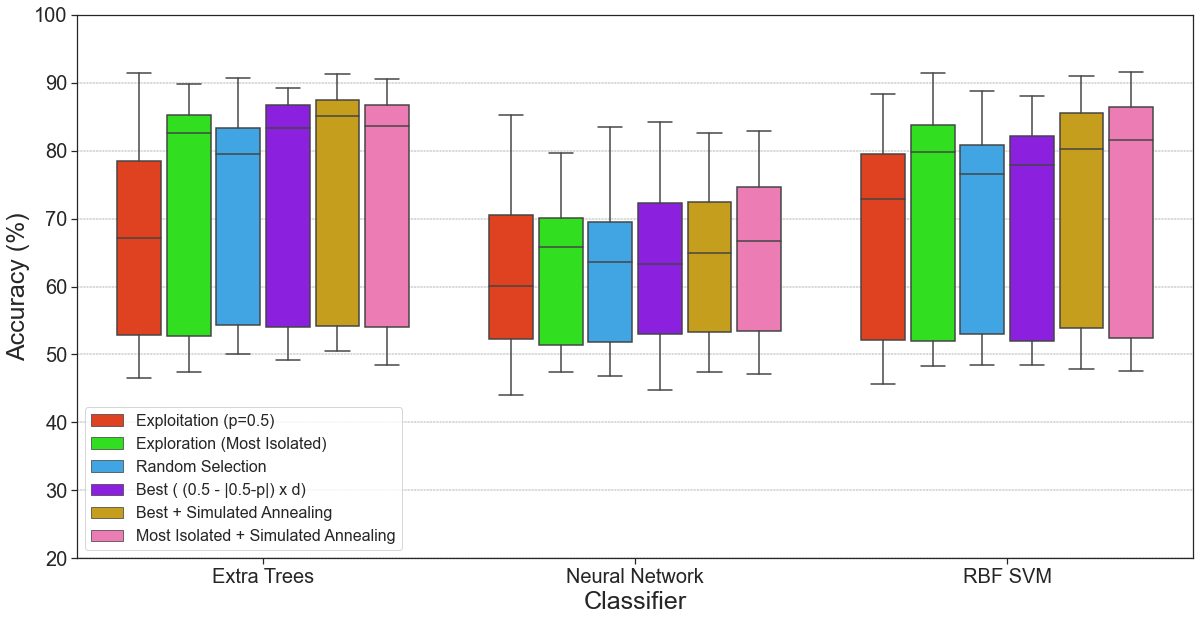

In [43]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pylab as pylab
sns.set_theme(style="ticks", palette="pastel")

big_boi = pd.concat([branin_et,eggholder_et,hblau_et,branin_nn,eggholder_nn,hblau_nn,branin_rbf,eggholder_rbf,hblau_rbf])
data = big_boi.loc[(big_boi['Iteration']==21)]

xlow = 20
xhigh = 100

palette = {'Exploitation (p=0.5)': '#ff2d00', 'Exploration (Most Isolated)': '#18ff00','Random Selection': '#26abff',
               'Best ( (0.5 - |0.5-p|) x d)': '#9000ff','Best + Simulated Annealing': '#e1ad01','Most Isolated + Simulated Annealing': '#ff69b4'}
   

fig, ax = pyplot.subplots(figsize=(20,10))
plt = sns.boxplot(x="Classifier", y="Accuracy",data=data,
            hue="Method", palette=palette, ax=ax)
ax.set(ylim=(xlow,xhigh))

plt.legend(loc=0, prop={'size': 16})

plt.axis

adjust_box_widths(fig, 0.9)

ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
plt.grid(axis = 'y', color = 'black', linestyle = '-.', linewidth = 0.3)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('Accuracy (%)')

KeyError: 'Exploitation (p=0.5)'

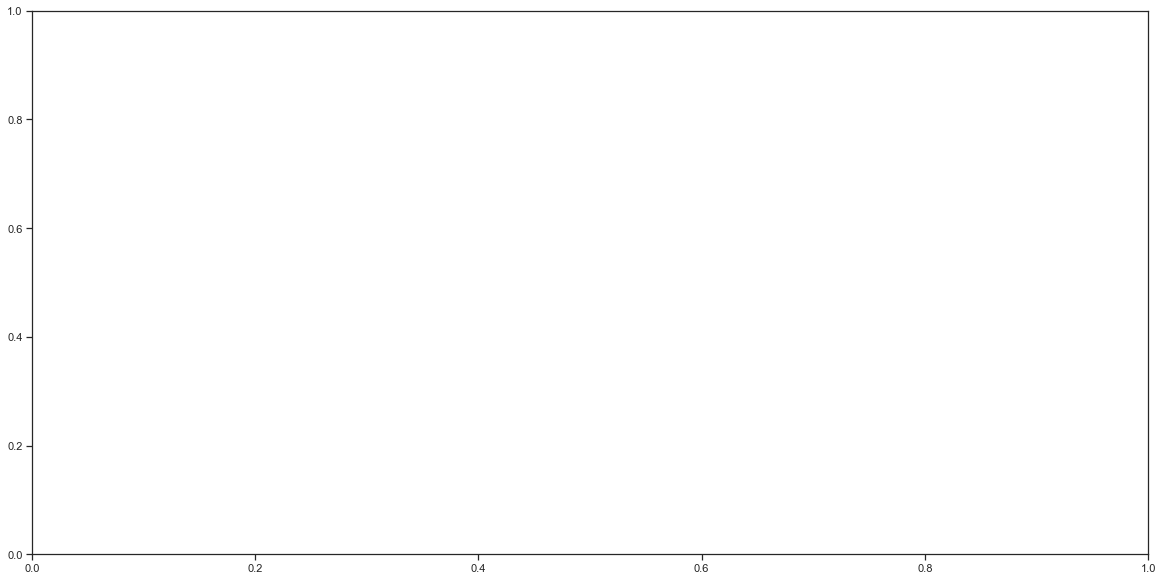

In [38]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pylab as pylab
sns.set_theme(style="ticks", palette="pastel")

big_boi = pd.concat([branin_et,eggholder_et,eggholder_et,branin_nn,eggholder_nn,hblau_nn,branin_rbf,eggholder_rbf,hblau_rbf])
data = big_boi.loc[(big_boi['Iteration']==1)]

xlow = 40
xhigh = 100

palette = {'hblau': '#ff2d00', 'Branin': '#18ff00','Eggholder': '#26abff',
               'Best ( (0.5 - |0.5-p|) x d)': '#9000ff','Best + Simulated Annealing': '#e1ad01','Most Isolated + Simulated Annealing': '#ff69b4'}
   
 

fig, ax = pyplot.subplots(figsize=(20,10))
plt = sns.boxplot(x="Model", y="Accuracy",data=data,
            hue="Method", palette=palette, ax=ax)
ax.set(ylim=(xlow,xhigh))

plt.legend(loc=0, prop={'size': 16})

plt.axis

adjust_box_widths(fig, 0.9)

ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
plt.grid(axis = 'y', color = 'black', linestyle = '-.', linewidth = 0.3)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('Accuracy (%)')

ValueError: The palette dictionary is missing keys: {'Exploration (Most Isolated)', 'Random Selection', 'Exploitation (p=0.5)'}

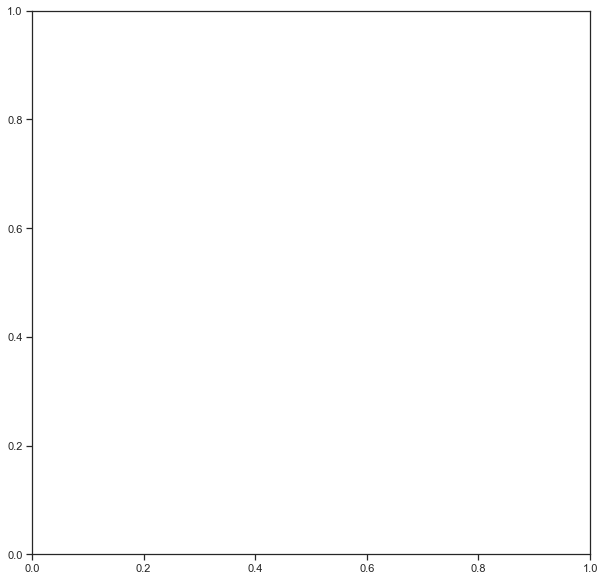

In [39]:
data = big_boi
data = big_boi.loc[(big_boi['Model']!='Eggholder')]
fig, ax = pyplot.subplots(figsize=(10,10))

fig = sns.lineplot(x='Iteration', y='Accuracy', data=data, palette=palette, hue='Method', ci=None)

ax1.legend(loc='center left', bbox_to_anchor=(1, .8), ncol=1)


NameError: name 'ax1' is not defined

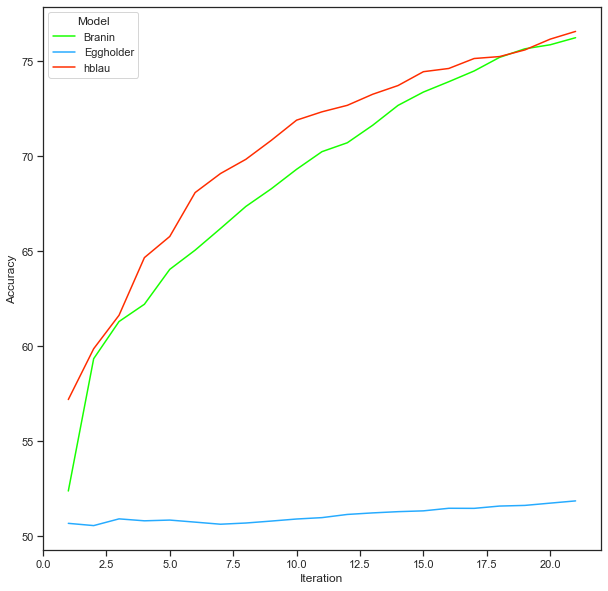

In [40]:
data = big_boi
fig, ax = pyplot.subplots(figsize=(10,10))

palette2 = {'hblau': '#ff2d00', 'Branin': '#18ff00','Eggholder': '#26abff',
               'Best ( (0.5 - |0.5-p|) x d)': '#9000ff','Best + Simulated Annealing': '#e1ad01','Most Isolated + Simulated Annealing': '#ff69b4'}
   


fig = sns.lineplot(x='Iteration', y='Accuracy', data=data, palette=palette2, hue='Model', ci=None)

ax1.legend(loc='center left', bbox_to_anchor=(1, .8), ncol=1)


In [55]:
statistics.median(big_boi.loc[(big_boi['Iteration']==21)&(big_boi['Model']!='Eggholder')]['Accuracy'].tolist())-statistics.median(big_boi.loc[(big_boi['Iteration']==21)&(big_boi['Model']!='Eggholder')]['Accuracy'].tolist())

0.0

In [61]:
big_boi = pd.concat([branin_et,eggholder_et,eggholder_et,branin_nn,eggholder_nn,hblau_nn,branin_rbf,eggholder_rbf,hblau_rbf])


In [65]:
statistics.median(big_boi.loc[(big_boi['Iteration']==21) & (big_boi['Method']=='Best ( (0.5 - |0.5-p|) x d)')&(big_boi['Model']!='Eggholder')]['Accuracy'].tolist())-statistics.median(big_boi.loc[(big_boi['Iteration']==21) & (big_boi['Method']=='Best + Simulated Annealing')&(big_boi['Model']!='Eggholder')]['Accuracy'].tolist())



-3.249375120169205

In [66]:
statistics.median(big_boi.loc[(big_boi['Iteration']==21) & (big_boi['Method']=='Exploration (Most Isolated)')&(big_boi['Model']!='Eggholder')]['Accuracy'].tolist())-statistics.median(big_boi.loc[(big_boi['Iteration']==21) & (big_boi['Method']=='Most Isolated + Simulated Annealing')&(big_boi['Model']!='Eggholder')]['Accuracy'].tolist())


-2.153432032301481

In [49]:
statistics.median(big_boi.loc[(big_boi['Iteration']==21) & (big_boi['Model']=='Branin')]['Accuracy'].tolist())-statistics.median(big_boi.loc[(big_boi['Iteration']==1) & (big_boi['Model']=='Branin')]['Accuracy'].tolist())


26.446837146702563

In [ ]:
  palette = {'Exploitation (p=0.5)': '#ff2d00', 'Exploration (Most Isolated)': '#18ff00','Random Selection': '#26abff',
               'Best ( (0.5 - |0.5-p|) x d)': '#9000ff','Best + Simulated Annealing': '#e1ad01','Most Isolated + Simulated Annealing': '#ff69b4'}
   